In [26]:
import pickle
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import datetime
import numpy as np

# Andiamo a carcare il pickle salvato delle serie su ndvi

Data set:    [[[-0.06657371]
  [-0.04981095]
  [-0.03310659]
  ...
  [ 0.30050689]
  [ 0.29790122]
  [ 0.29532761]]

 [[-0.06859129]
  [-0.05126447]
  [-0.03399733]
  ...
  [ 0.34696373]
  [ 0.3452061 ]
  [ 0.34347831]]

 [[-0.06907575]
  [-0.05180134]
  [-0.03458674]
  ...
  [ 0.29794357]
  [ 0.29523921]
  [ 0.29256932]]

 ...

 [[-0.06941363]
  [-0.05187886]
  [-0.03440303]
  ...
  [ 0.3007645 ]
  [ 0.2992479 ]
  [ 0.29778421]]

 [[-0.0683659 ]
  [-0.05090044]
  [-0.03349436]
  ...
  [ 0.29501561]
  [ 0.2934691 ]
  [ 0.29197409]]

 [[-0.06950268]
  [-0.05196727]
  [-0.03449072]
  ...
  [ 0.31945081]
  [ 0.31838454]
  [ 0.3173658 ]]]
grid_points:    (array([ 43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,

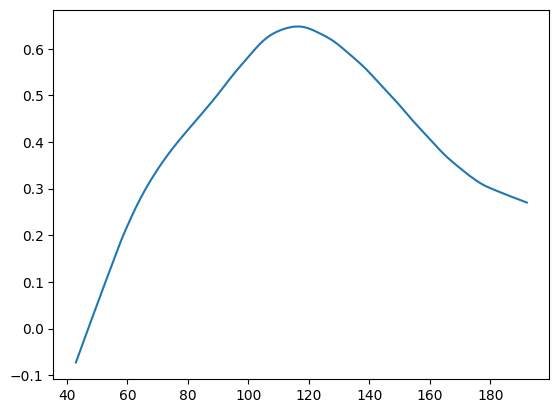

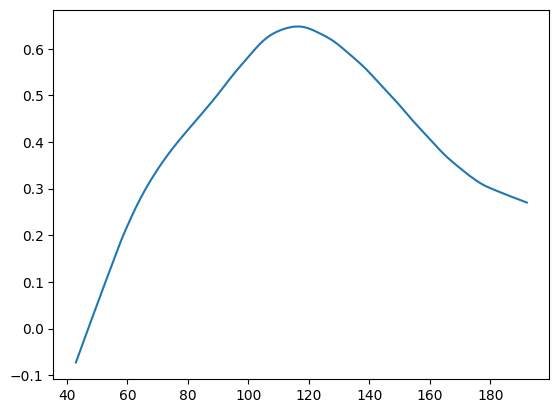

In [11]:
with open('hdvi.pickle', 'rb') as handle:
    NDVI = pickle.load(handle)
print(NDVI)
NDVI[30].plot()

# Procediamo con l'addestramento di NeuralProphet

In [43]:
# Costruiamo il dataframe per l'addestramento
# Devo ricostruire le date

rangeForNewDate = range(43,193)

days = []
zeroDay = datetime.datetime.strptime("2017-01-01","%Y-%m-%d")

for a in rangeForNewDate:
    days.append((zeroDay + datetime.timedelta(days=a)))
serie = NDVI[40].data_matrix.flatten()


d = {'ds': days, 'y': serie}
data = pd.DataFrame(data=d)
data.head(5)

,ds,y
0,2017-02-13,-0.072685
1,2017-02-14,-0.054671
2,2017-02-15,-0.036719
3,2017-02-16,-0.018831
4,2017-02-17,-0.001009


# Eseguiamo l'addestramento

In [48]:
m = NeuralProphet()
model = m.fit(data, freq='D', epochs=1000)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (10) is too small than the required number for the learning rate finder (209). The results might not be optimal.


Finding best initial lr:   0%|          | 0/209 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

# Facciamo la previsione

In [46]:
future = m.make_future_dataframe(data, periods=365)
forecast = m.predict(future)
forecast.head(5)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 10it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_weekly
0,2017-07-13,None,0.270876,0.270982,-0.000106
1,2017-07-14,None,0.266837,0.266606,0.000231
2,2017-07-15,None,0.262418,0.262230,0.000188
3,2017-07-16,None,0.258155,0.257853,0.000302
4,2017-07-17,None,0.252721,0.253477,-0.000756


# Stampa della previsione

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


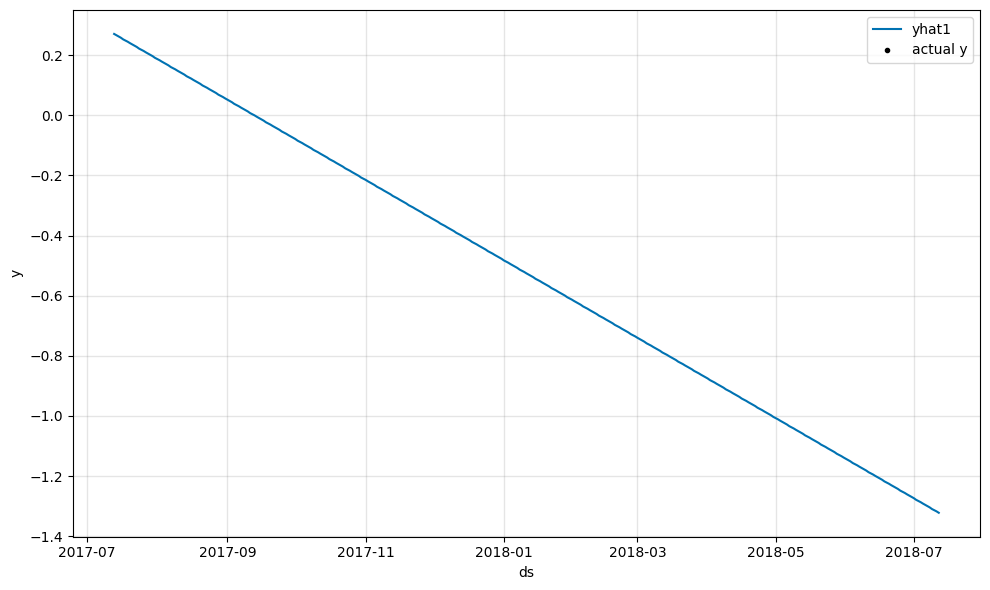

In [47]:
plot1 = m.plot(forecast)

# Addestramento di GRU e LSTM